In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('../dataset/data.csv')

In [11]:
columns_to_retain = ['LoanAmountRequested', 'LoanTerm', 'ExistingLiabilities', 'PreviousLoans', 'Dependents', 'Occupation', 'IncomeLevel', 'ResidentialStatus', 'CreditScore', 'IsFraud']
data = data[columns_to_retain]


In [12]:
imputer = SimpleImputer(strategy='mean')
for col in data.columns:
    if data[col].dtype == 'object':
        imputer = SimpleImputer(strategy='most_frequent')
    data[col] = imputer.fit_transform(data[col].values.reshape(-1, 1)).ravel()

In [13]:
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

In [14]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)


Epoch 1/25


200/200 [==============================] - 2s 5ms/step - loss: 0.2583 - accuracy: 0.7756 - val_loss: 0.2161 - val_accuracy: 0.7856
Epoch 2/25
200/200 [==============================] - 1s 3ms/step - loss: 0.2119 - accuracy: 0.7906 - val_loss: 0.1999 - val_accuracy: 0.8081
Epoch 3/25
200/200 [==============================] - 1s 5ms/step - loss: 0.1960 - accuracy: 0.8134 - val_loss: 0.1933 - val_accuracy: 0.8087
Epoch 4/25
200/200 [==============================] - 1s 4ms/step - loss: 0.1908 - accuracy: 0.8139 - val_loss: 0.1931 - val_accuracy: 0.8087
Epoch 5/25
200/200 [==============================] - 1s 3ms/step - loss: 0.1890 - accuracy: 0.8152 - val_loss: 0.1930 - val_accuracy: 0.8106
Epoch 6/25
200/200 [==============================] - 1s 3ms/step - loss: 0.1871 - accuracy: 0.8156 - val_loss: 0.1935 - val_accuracy: 0.8100
Epoch 7/25
200/200 [==============================] - 1s 3ms/step - loss: 0.1853 - accuracy: 0.8169 - val_loss: 0.1908 - val_accuracy: 0.8094
Epoch 8/25
200/20

In [18]:
model.save("../models/bank.h5")

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# 5. Evaluation
predictions = model.predict(X_test)
predictions = [1 if p > 0.5 else 0 for p in predictions] 
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
# Generating confusion matrix
cm = confusion_matrix(y_test, predictions)

63/63 [==============================] - 0s 2ms/step
0.7865
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1530
           1       0.57      0.39      0.46       470

    accuracy                           0.79      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.77      0.79      0.77      2000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


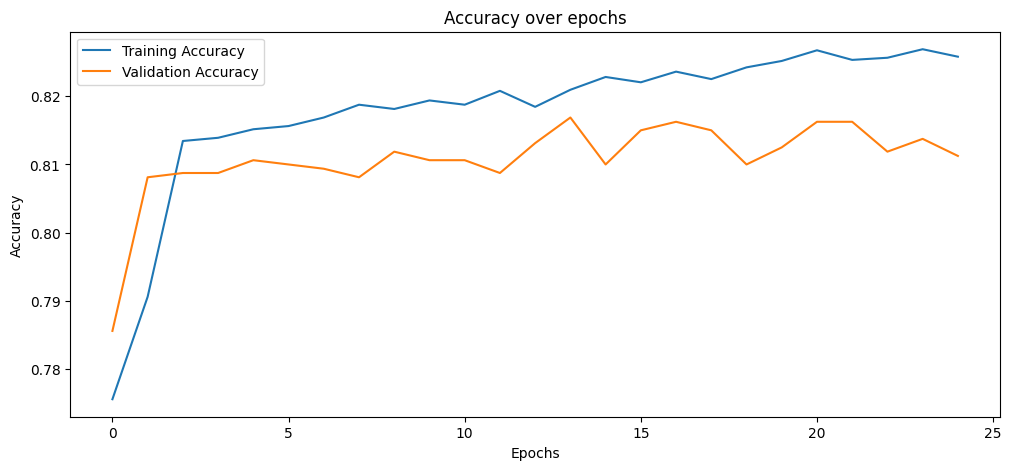

In [20]:
# Check available keys in the history object
print(history.history.keys())

# If 'acc' and 'val_acc' are in the output, use them. If not, use 'accuracy' and 'val_accuracy'.
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # or 'acc' based on the keys
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # or 'val_acc' based on the keys
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


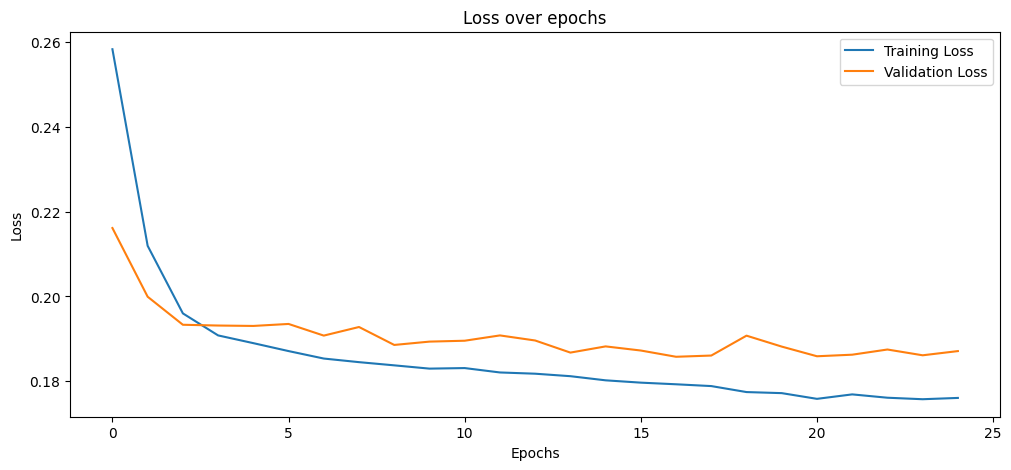

In [21]:
# Plotting training loss & validation loss
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

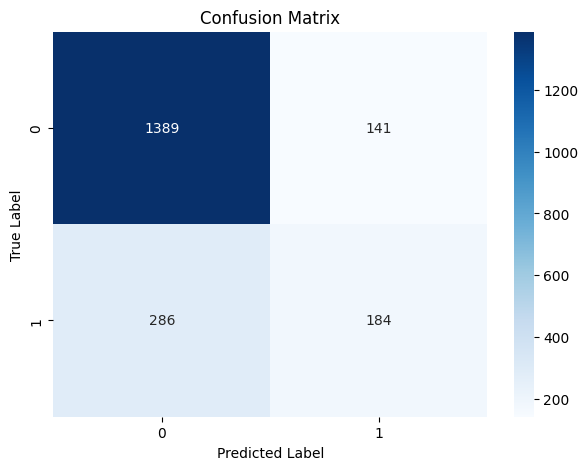

In [22]:
# Plotting confusion matrix as a heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

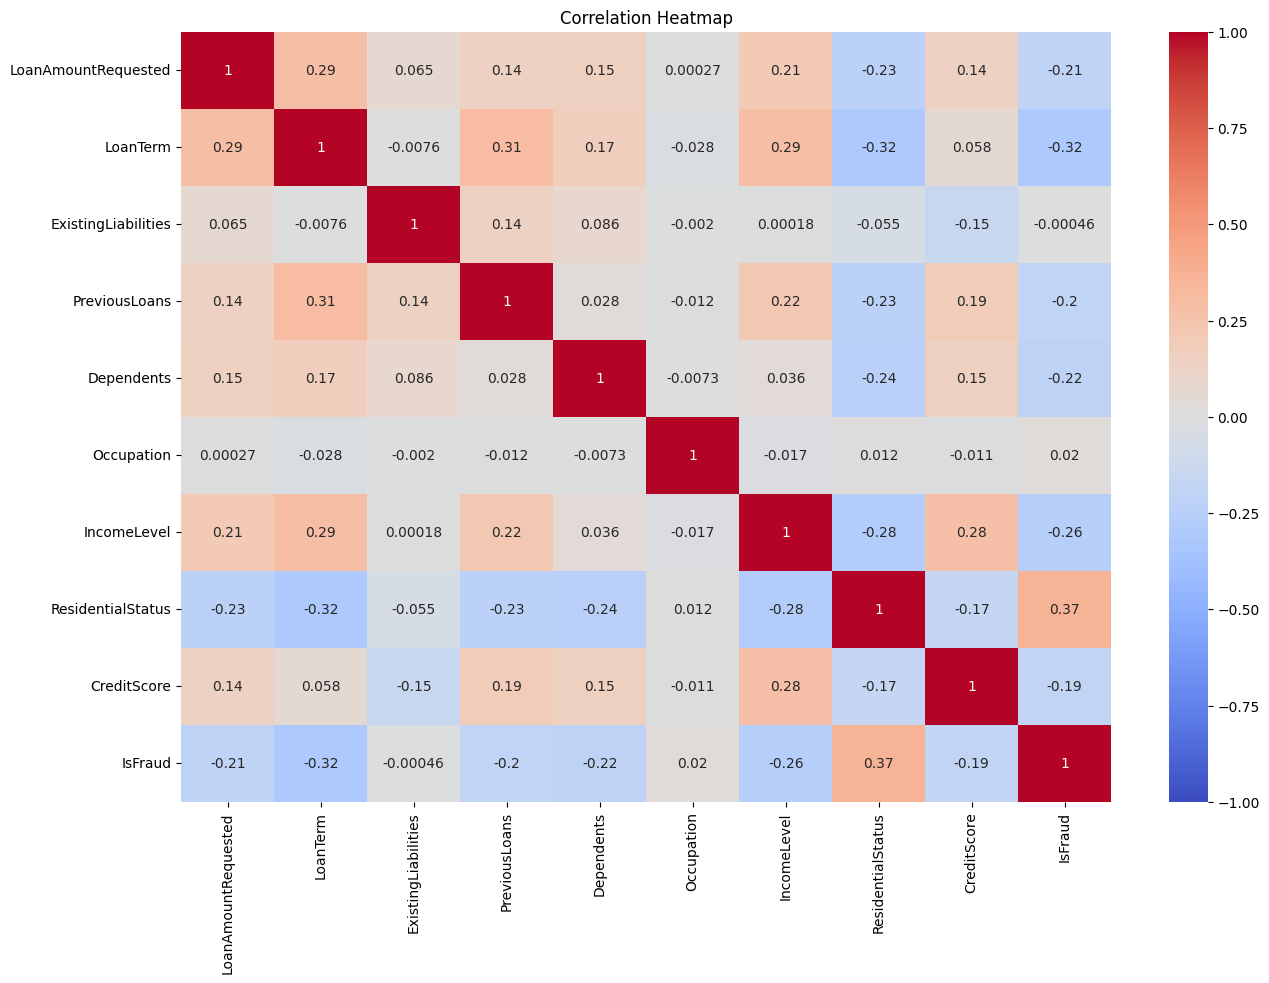

In [23]:
correlation_matrix = data.corr()

# Setting up the size of the figure
plt.figure(figsize=(15, 10))

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [24]:
def predict_fraud(LoanAmountRequested, LoanTerm, ExistingLiabilities, PreviousLoans, Dependents, Occupation, IncomeLevel, ResidentialStatus, CreditScore):
    input_data = pd.DataFrame({
        'LoanAmountRequested': [LoanAmountRequested],
        'LoanTerm': [LoanTerm],
        'ExistingLiabilities': [ExistingLiabilities],
        'PreviousLoans': [PreviousLoans],
        'Dependents': [Dependents],
        'Occupation': [Occupation],
        'IncomeLevel': [IncomeLevel],
        'ResidentialStatus': [ResidentialStatus],
        'CreditScore': [CreditScore]
    })

    for col in input_data.columns:
        if input_data[col].dtype == 'object' and col in label_encoders:
            input_data[col] = label_encoders[col].transform(input_data[col])

    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    return "Fraud" if prediction > 0.5 else "Not Fraud"

In [25]:
def get_user_input():
    LoanAmountRequested = float(input("Enter Loan Amount Requested: "))
    LoanTerm = int(input("Enter Loan Term (in years): "))
    ExistingLiabilities = int(input("Enter Number of Existing Liabilities: "))
    PreviousLoans = int(input("Enter Number of Previous Loans: "))
    Dependents = int(input("Enter Number of Dependents: "))
    Occupation = input("Enter Occupation: ")
    IncomeLevel = float(input("Enter Income Level: "))
    ResidentialStatus = input("Enter Residential Status (Own, Rent, etc.): ")
    CreditScore = int(input("Enter Credit Score: "))

    result = predict_fraud(LoanAmountRequested, LoanTerm, ExistingLiabilities, PreviousLoans, Dependents, Occupation, IncomeLevel, ResidentialStatus, CreditScore)
    return result

In [27]:
prediction_result = get_user_input()
print(f"The transaction is predicted to be: {prediction_result}")

1/1 [==============================] - 0s 27ms/step
The transaction is predicted to be: Not Fraud
